# **Problem 1 : Write the code from “Exercise 0” to “Exercise 4” described in the class.**

**Exercise 1: TensorFlow Implementation (Filters)**

In [4]:
# import tensorflor and keras
# Change the runtime type to CPU ( Run Time -> Run Time Type -> CPU )
import tensorflow as tf
from tensorflow import keras

In [5]:
# import numpy and os
import numpy as np
import os

In [6]:
# import matplotlib and matplotlib.pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
# import sklearn and load_sample_image from sklearn.datasets
import sklearn
from sklearn.datasets import load_sample_image

In [8]:
# normalize the china and flower data
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china, flower])

In [9]:
batch_size, height, width, channels = images.shape
print("batch_size : ",batch_size,"\nheight * width : ", height,"*",width,"\nchannels :", channels)

batch_size :  2 
height * width :  427 * 640 
channels : 3


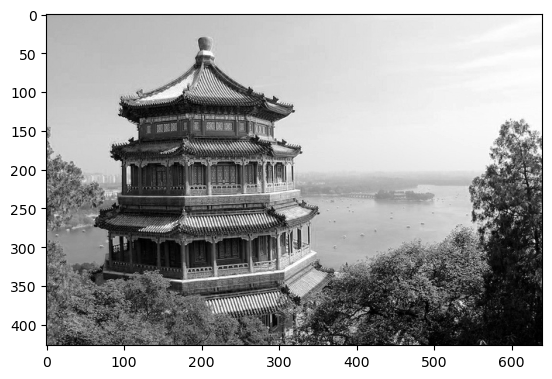

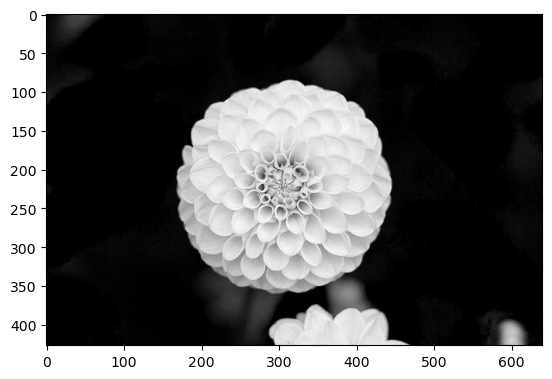

In [10]:
plt.imshow(images[0][:,:,0], cmap='gray')
plt.show()
plt.imshow(images[1][:,:,0], cmap='gray')
plt.show()

In [11]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

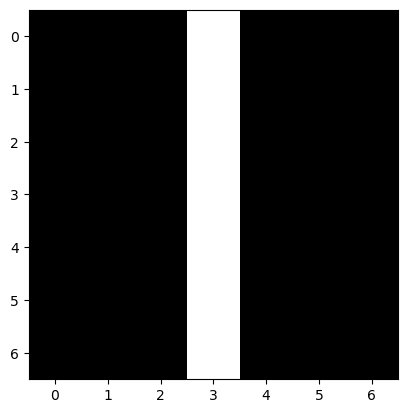

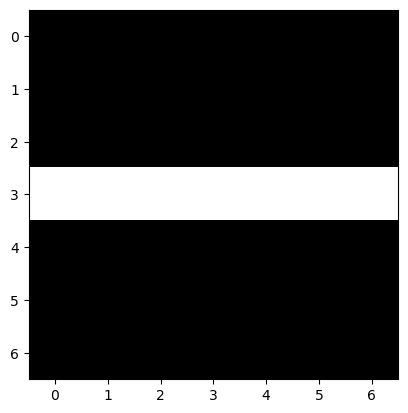

In [12]:
# Visualizing
plt.imshow(filters[:, :, 0, 0],cmap="gray") # First filter
plt.show()
plt.imshow(filters[:, :, 0, 1],cmap="gray") # Second filter
plt.show()

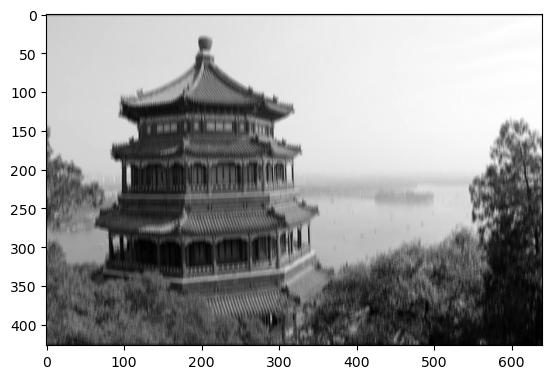

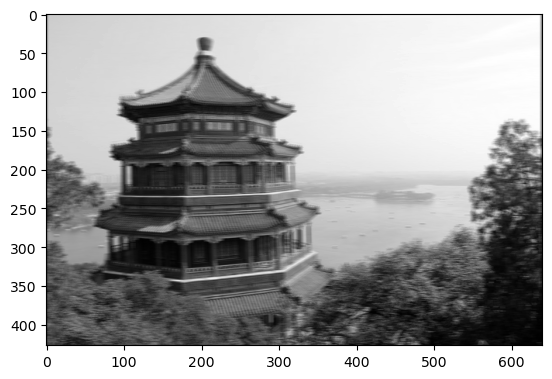

In [13]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
plt.show()
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.show()

In [14]:
# Function for cropping
def crop(images):
  return images[150:220, 130:250]

Input


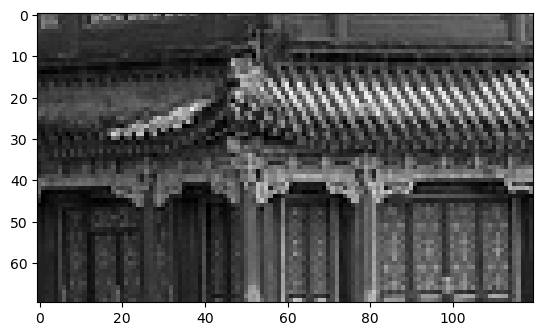

In [15]:
print("Input")
plt.imshow(crop(images[0, :, :, 0]),cmap="gray")
plt.show()

china_vertical


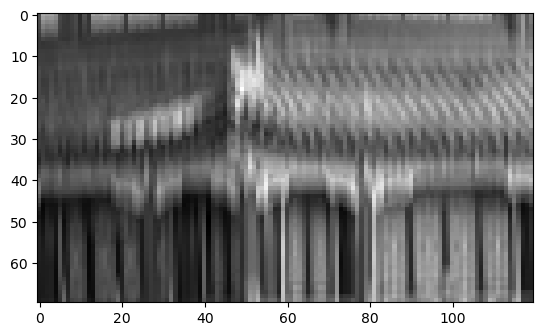

china_horizontal


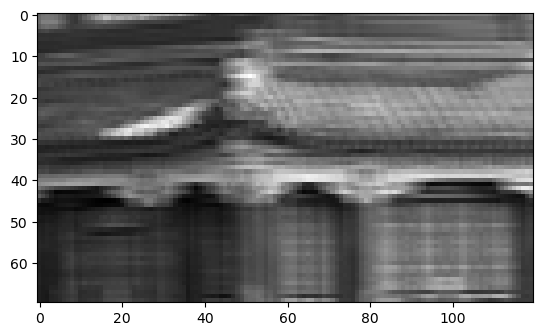

In [16]:
for feature_map_index, filename in enumerate(["china_vertical","china_horizontal"]):
    print(filename)
    plt.imshow(crop(outputs[0, :, :, feature_map_index]),cmap="gray")
    plt.show()

**Exercise 2: TensorFlow Implementation (Pooling Layers)**

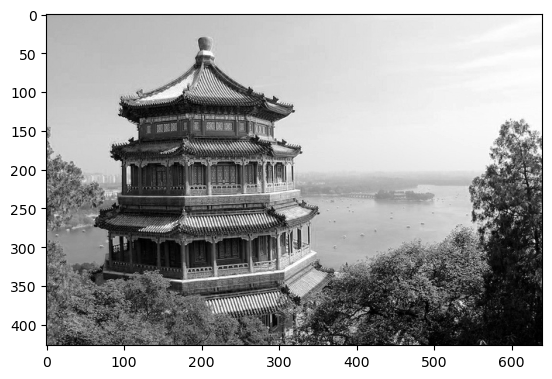

Input's H*W :  (427, 640)


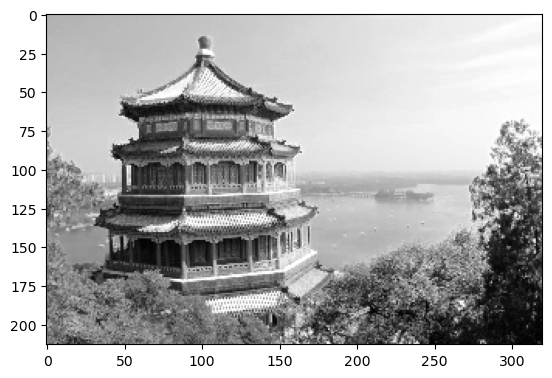

Output's H*W :  (213, 320)


In [17]:
# pooling layer
max_pool = keras.layers.MaxPool2D(pool_size=2,dtype="float64")
outputs = max_pool(images)
plt.imshow(images[0, :, :, 0], cmap="gray")
plt.show()
print("Input's H*W : ",images[0, :, :, 0].shape)
plt.imshow(outputs[0, :, :, 0], cmap="gray")
plt.show()
print("Output's H*W : ",outputs[0, :, :, 0].shape)

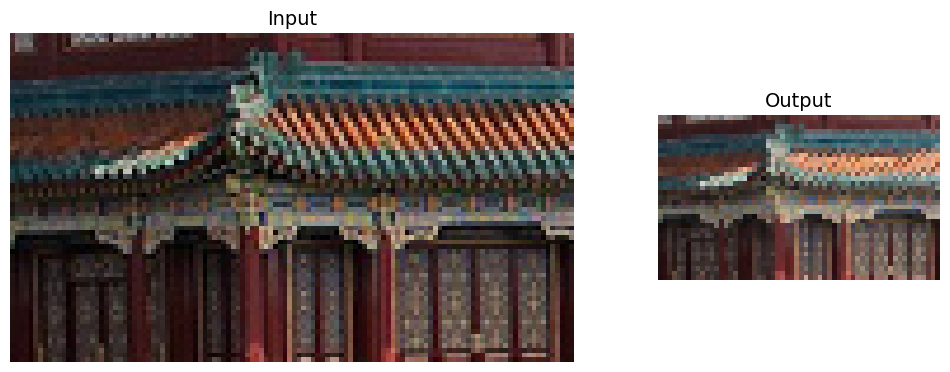

In [18]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)
# Show the figures side-by-side in a grid
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0]) # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0]) # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [19]:
# When you run the following code, if you encounter an error saying that tf.nn.max_pool is unimplemented,
# you should change the runtime type to None (In the menu bar of this notebook,
# choose Runtime -> Change runtime type and then select CPU in Hardware accelerator)
# After that, you need to rerun the codes in the Preliminaries and Exercise 1.
# Depth-wise max pooling layer
output = tf.nn.max_pool(images, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding="VALID")

print("images shape:",images.shape) # N * H * W * C
print("output shape:",output.shape) # N * H * W * C

images shape: (2, 427, 640, 3)
output shape: (2, 427, 640, 1)


In [20]:
type(images)

numpy.ndarray

In [21]:
# Keras model : wrap it in a Lambda layer
depth_pool = keras.layers.Lambda(
lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3),padding="VALID"),dtype="float64")
output=depth_pool(images)

print("images :",images.shape) # N * H * W * C
print("output :",output.shape) # N * H * W * C

images : (2, 427, 640, 3)
output : (2, 427, 640, 1)


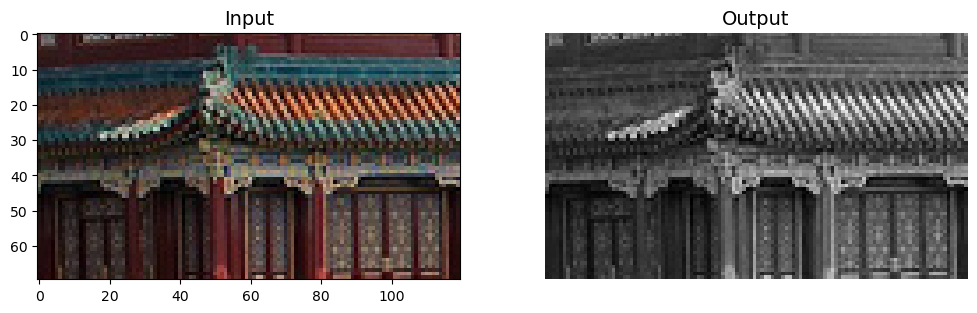

In [22]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input", fontsize=14)
plt.imshow(cropped_images[0]) # plot the 1st image
plt.subplot(1, 2, 2)
plt.title("Output", fontsize=14)
plt.imshow(depth_pool(cropped_images)[0,...,0],cmap="gray") # plot the output for the 1st image
plt.axis("off")
plt.show()

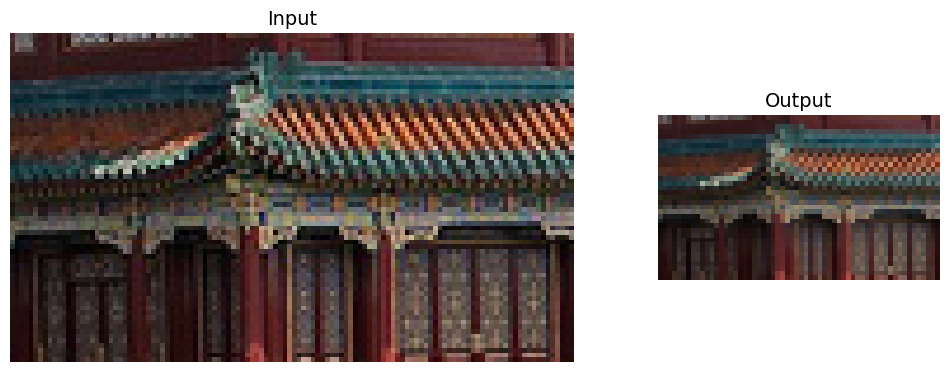

In [23]:
avg_pool = keras.layers.AvgPool2D(pool_size=2)
output_avg = avg_pool(cropped_images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0]) # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0]) # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [24]:
# global average pooling
global_avg_pool = keras.layers.GlobalAvgPool2D(dtype="float64")
output=global_avg_pool(images)

print("images :",images.shape) # N * H * W * C
print("output :",output.shape) # N * C

images : (2, 427, 640, 3)
output : (2, 3)


In [25]:
# Keras model : wrap it in a Lambda layer
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1,2]),dtype="float64")
output=global_avg_pool(images)
print("images :",images.shape) # N * H * W * C
print("output :",output.shape) # N * C

images : (2, 427, 640, 3)
output : (2, 3)


**Exercise 3: CNN Architectures**

In [26]:
# From here, change the runtime type to T4 GPU

import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [27]:
model = keras.models.Sequential([
    keras.layers.Conv2D(3, 3, activation="relu", padding="same",
    input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(16, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
# data normalization
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [29]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7858 - accuracy: 0.7151 - val_loss: 0.4326 - val_accuracy: 0.8410
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4806 - accuracy: 0.8366 - val_loss: 0.3632 - val_accuracy: 0.8624
Epoch 3/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4143 - accuracy: 0.8576 - val_loss: 0.3341 - val_accuracy: 0.8788
Epoch 4/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3762 - accuracy: 0.8724 - val_loss: 0.3276 - val_accuracy: 0.8792
Epoch 5/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3495 - accuracy: 0.8817 - val_loss: 0.3052 - val_accuracy: 0.8850
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3290 - accuracy: 0.8883 - val_loss: 0.2998 - val_accuracy: 0.8884
Epoch 7/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3115 - accuracy: 0.8931 - val_loss: 0.2960 - val_

**Exercise 4: Build your own CNN from scratch**

In [30]:
class MyModel(tf.keras.Model):
  def __init__(self):
    # call the present constructor
    super(MyModel, self).__init__()
    #initalize the layers
    self.conv1 = tf.keras.layers.Conv2D(kernel_size=5, filters=16, activation='relu', padding = "same")
    self.conv2 = tf.keras.layers.Conv2D(kernel_size=5, filters=16, activation='relu', padding = "same")
    self.conv3 = tf.keras.layers.Conv2D(kernel_size=5, filters=16, activation='relu', padding = "same")
    self.conv4 = tf.keras.layers.Conv2D(kernel_size=5, filters=16, activation='relu', padding = "same")
    self.pool = tf.keras.layers.MaxPooling2D(2)
    self.flatten = tf.keras.layers.Flatten()
    self.d1 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.pool(x)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.conv3(x)
    x = self.pool(x)
    x = self.conv4(x)
    x = self.flatten(x)
    x = self.d1(x)
    return x

model2 = MyModel()

In [31]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])
history = model2.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))
score = model2.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model2.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 25s 14ms/step - loss: 0.4884 - accuracy: 0.8250 - val_loss: 0.3704 - val_accuracy: 0.8652
Epoch 2/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3312 - accuracy: 0.8805 - val_loss: 0.3199 - val_accuracy: 0.8818
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2914 - accuracy: 0.8931 - val_loss: 0.3059 - val_accuracy: 0.8870
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2656 - accuracy: 0.9022 - val_loss: 0.2968 - val_accuracy: 0.8942
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2489 - accuracy: 0.9075 - val_loss: 0.2848 - val_accuracy: 0.8954
Epoch 6/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2314 - accuracy: 0.9141 - val_loss: 0.2836 - val_accuracy: 0.8978
Epoch 7/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.2186 - accuracy: 0.9178 - val_loss: 0.2775 -

# **Problem 2 : Build the model of “Exercise 3” using subclass API from “Exercise 4”**

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [33]:
# Build the model from "Exercise 3"

class MyModel1(tf.keras.Model):
  def __init__(self):
    # call the present constructor
    super(MyModel1, self).__init__()
    #initalize the layers
    self.conv1 = keras.layers.Conv2D(3, 3, activation="relu", padding="same",
    input_shape=[28, 28, 1])
    self.pool1 = keras.layers.MaxPooling2D(2)
    self.conv2 = keras.layers.Conv2D(16, 3, activation="relu", padding="same")
    self.conv3 = keras.layers.Conv2D(16, 3, activation="relu", padding="same")
    self.pool2 = keras.layers.MaxPooling2D(2)
    self.conv4 = keras.layers.Conv2D(32, 3, activation="relu", padding="same")
    self.conv5 = keras.layers.Conv2D(32, 3, activation="relu", padding="same")
    self.pool3 = keras.layers.MaxPooling2D(2)
    self.flatten = keras.layers.Flatten()
    self.d1 = keras.layers.Dense(128, activation="relu")
    self.drop1 = keras.layers.Dropout(0.5)
    self.d2 = keras.layers.Dense(64, activation="relu")
    self.drop2 = keras.layers.Dropout(0.5)
    self.d3 = keras.layers.Dense(10, activation="softmax")

  def call(self, x):
    #Forward the model
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.pool2(x)
    x = self.conv4(x)
    x = self.conv5(x)
    x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    x = self.drop1(x)
    x = self.d2(x)
    x = self.drop2(x)
    x = self.d3(x)
    return x

mymodel1 = MyModel1()

In [34]:
mymodel1.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])
history = mymodel1.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))
score = mymodel1.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = mymodel1.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7943 - accuracy: 0.7121 - val_loss: 0.4406 - val_accuracy: 0.8406
Epoch 2/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4894 - accuracy: 0.8311 - val_loss: 0.3743 - val_accuracy: 0.8648
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4276 - accuracy: 0.8514 - val_loss: 0.3338 - val_accuracy: 0.8724
Epoch 4/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3893 - accuracy: 0.8659 - val_loss: 0.3193 - val_accuracy: 0.8812
Epoch 5/10
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3653 - accuracy: 0.8748 - val_loss: 0.3106 - val_accuracy: 0.8814
Epoch 6/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3428 - accuracy: 0.8813 - val_loss: 0.2965 - val_accuracy: 0.8896
Epoch 7/10
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3301 - accuracy: 0.8871 - val_loss: 0.3059 - val_

In [ ]:
# Use this code to check if two models have same parameter.
model.build(input_shape=(1, 28, 28, 1))
print(model.summary())
mymodel1.build(input_shape=(1, 28, 28, 1))
print(mymodel1.summary())

# **Problem 3 : Build your own CNN model using subclass API from “Exercise 4” which has a performance of 90% or higher**

In [36]:


class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))
        self.conv2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')
        self.pool = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

# Create an instance of the modified model
mymodel2 = MyModel2()


In [37]:
mymodel2.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",metrics=["accuracy"])
history = mymodel2.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))
score = mymodel2.evaluate(X_test, y_test)
print(f'Test loss: {score[0]}, Test accuracy: {score[1]}')
X_new = X_test[:10] # pretend we have new images
y_pred = mymodel2.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.4092 - accuracy: 0.8562 - val_loss: 0.3046 - val_accuracy: 0.8898
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2760 - accuracy: 0.9008 - val_loss: 0.2684 - val_accuracy: 0.9022
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2335 - accuracy: 0.9146 - val_loss: 0.2444 - val_accuracy: 0.9110
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2052 - accuracy: 0.9254 - val_loss: 0.2507 - val_accuracy: 0.9054
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1809 - accuracy: 0.9323 - val_loss: 0.2451 - val_accuracy: 0.9110
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1631 - accuracy: 0.9391 - val_loss: 0.2491 - val_accuracy: 0.9090
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1416 - accuracy: 0.9472 - val_loss: 0.2327 - val_ac